In [1]:
#Import the Library
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import skew, kurtosis
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import balanced_accuracy_score
import copy

In [2]:
cardiac=pd.read_csv('cardiac.csv')
cardiac

,caseno,age,weight,gender,fitness_score,cardiac_condition
0,1,37,70.47,Male,55.79,Absent
1,2,73,50.34,Female,35.00,Absent
2,3,46,87.65,Male,42.93,Present
3,4,36,89.80,Female,28.30,Present
4,5,34,103.02,Male,40.56,Absent
...,...,...,...,...,...,...
95,96,42,111.98,Male,33.73,Present
96,97,43,88.07,Male,49.22,Present
97,98,45,94.07,Male,41.97,Present
98,99,58,97.46,Male,35.20,Present


In [3]:
#Split the data into Independent and Dependent Variable
x_cardiac=cardiac.iloc[:, :-1]
y_cardiac=cardiac['cardiac_condition']

In [4]:
#Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x_cardiac, y_cardiac, test_size=0.2, random_state=22212311)

## EDA

In [5]:
#Divide the columns among categorical and numerical data types
numerical=list()
categorical=list()
for i in cardiac.columns:
    if cardiac[i].dtype == 'object':
        categorical.append(i)
    else:
        numerical.append(i)

In [6]:
categorical

['gender', 'cardiac_condition']

In [7]:
numerical

['caseno', 'age', 'weight', 'fitness_score']

In [8]:
#Hard Code of level of measurements
ordinal=['cardiac_condition']
nominal=['gender']
ratio=['caseno', 'age', 'weight', 'fitness_score']
discrete=['caseno', 'age']
continous=['weight', 'fitness_score']

In [9]:
#Descriptive Statitics of train
x_train.describe(exclude='O')

,caseno,age,weight,fitness_score
count,80.000000,80.000000,80.000000,80.000000
mean,50.600000,41.475000,79.635750,43.848875
std,28.895534,9.926279,14.496971,8.797020
min,1.000000,30.000000,50.000000,27.350000
25%,27.750000,34.000000,70.890000,36.540000
50%,51.000000,39.000000,79.240000,43.205000
75%,75.250000,46.250000,89.462500,49.485000
max,100.000000,74.000000,115.420000,62.500000


In [10]:
#Calculate the skewness and kurtosis of each numerical variable
for i in numerical:
    skewness = skew(x_train[i])
    kurt = kurtosis(x_train[i])
    print("Skewness:", skewness,"Kurtosis:", kurt)

Skewness: -0.03724823875293556 Kurtosis: -1.1352083937008854
Skewness: 1.3055703587367191 Kurtosis: 1.3461492515316538
Skewness: 0.07067278190528765 Kurtosis: -0.3643967400174746
Skewness: 0.3187758424429991 Kurtosis: -0.577948470852224


# Visualisation

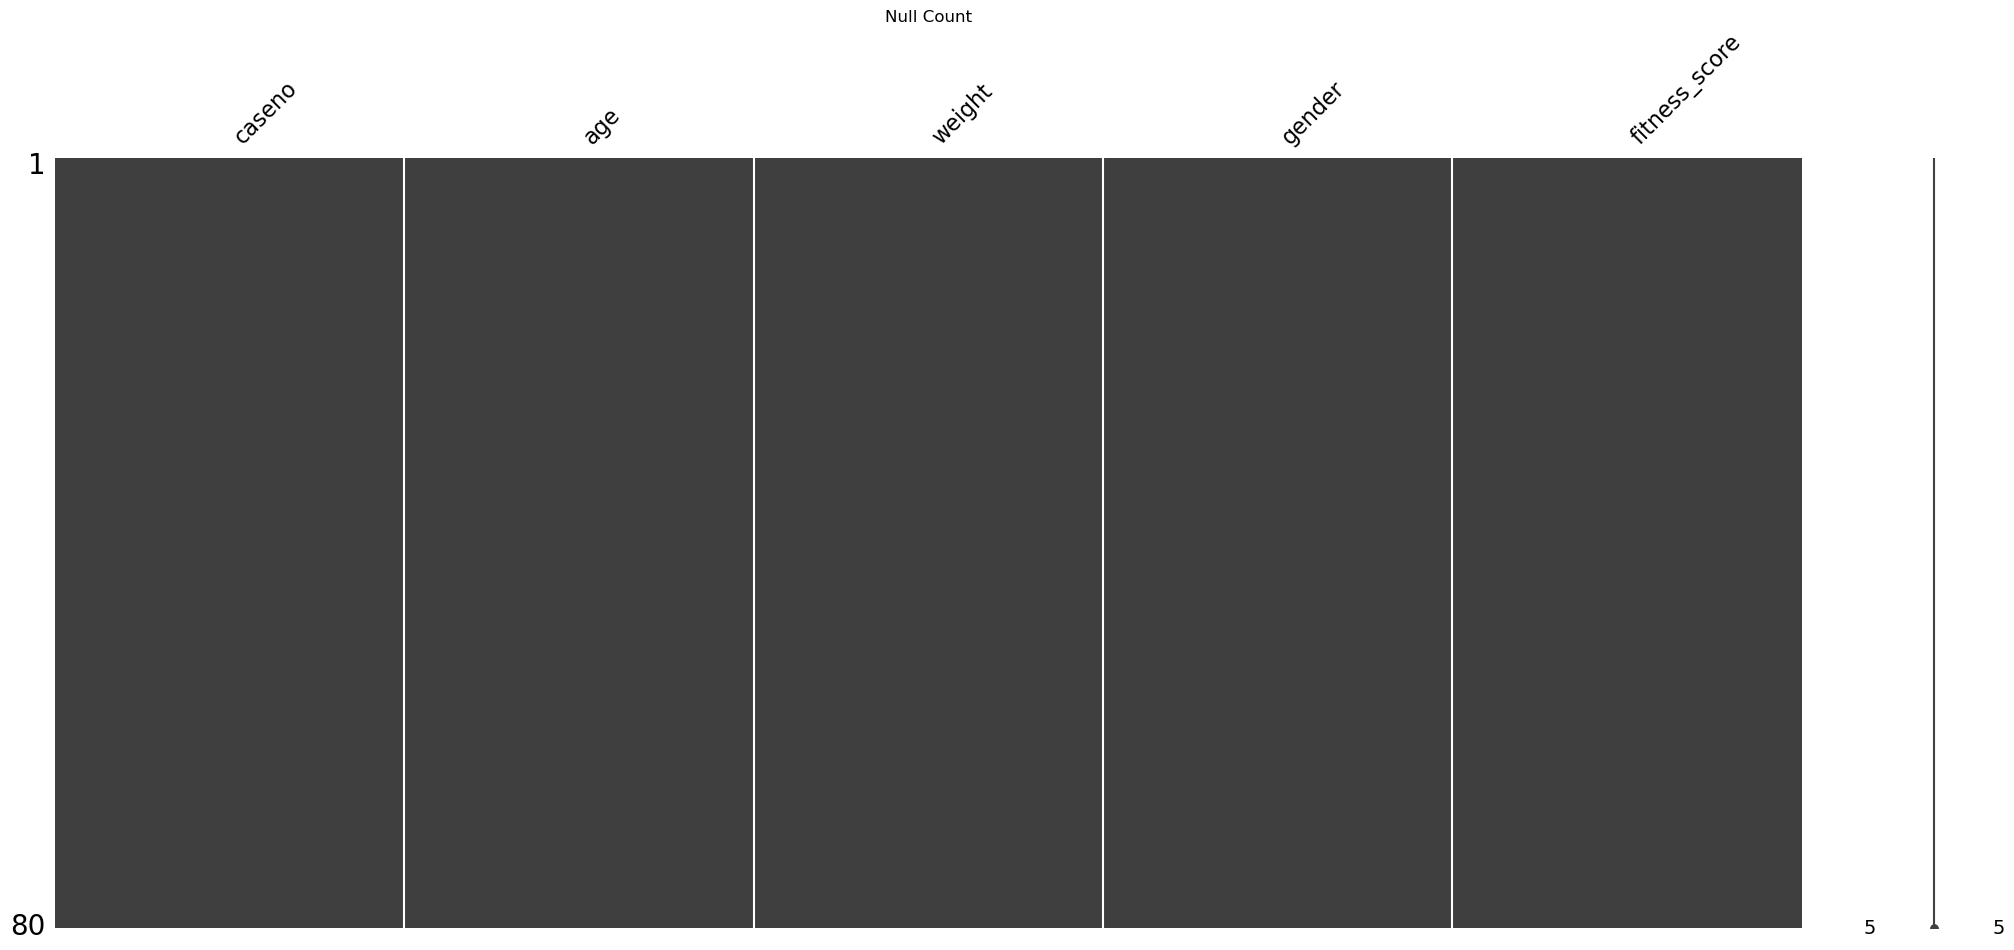

In [11]:
#Visualise the Null Values
msno.matrix(x_train)
plt.title('Null Count')
plt.show()

In [12]:
#Count the null values column wise
x_train.isna().sum()

caseno           0
age              0
weight           0
gender           0
fitness_score    0
dtype: int64

In [13]:
##Count the duplicate rows
x_train.duplicated().sum()

0

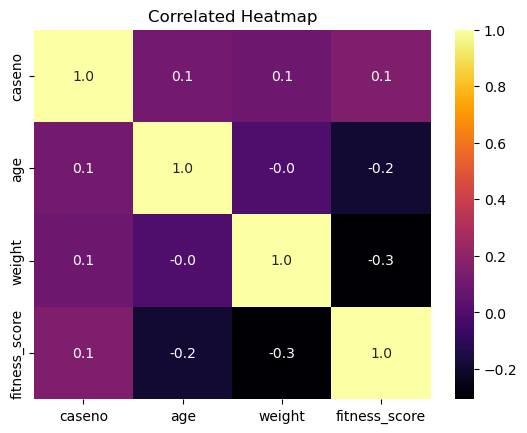

In [14]:
#Correlated Heatmap
numeric_columns = cardiac.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_columns.corr(), cmap="inferno", annot=True,fmt='.1f') 
plt.title('Correlated Heatmap')
plt.show()

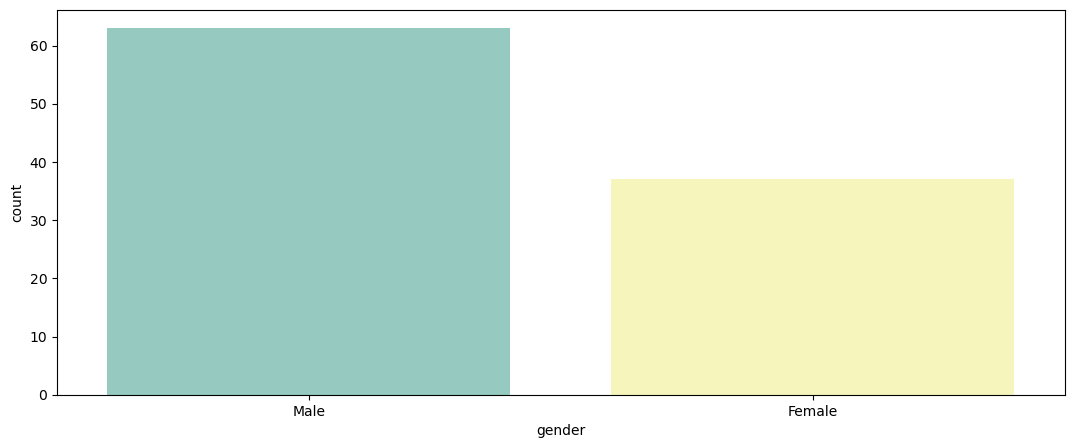

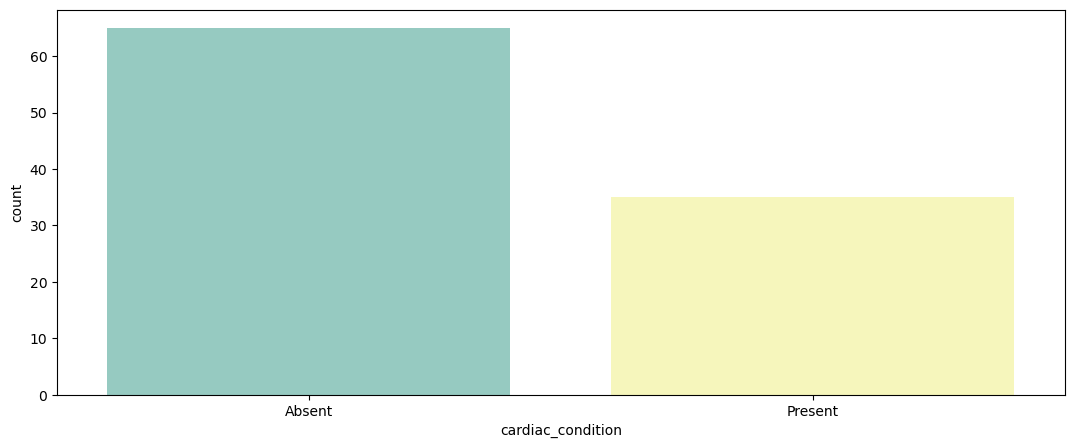

In [15]:
#countplot for categorical data
for i in categorical:
    plt.figure(figsize=(13, 5))
    sns.countplot(cardiac,x=i,palette='Set3')
    plt.show()

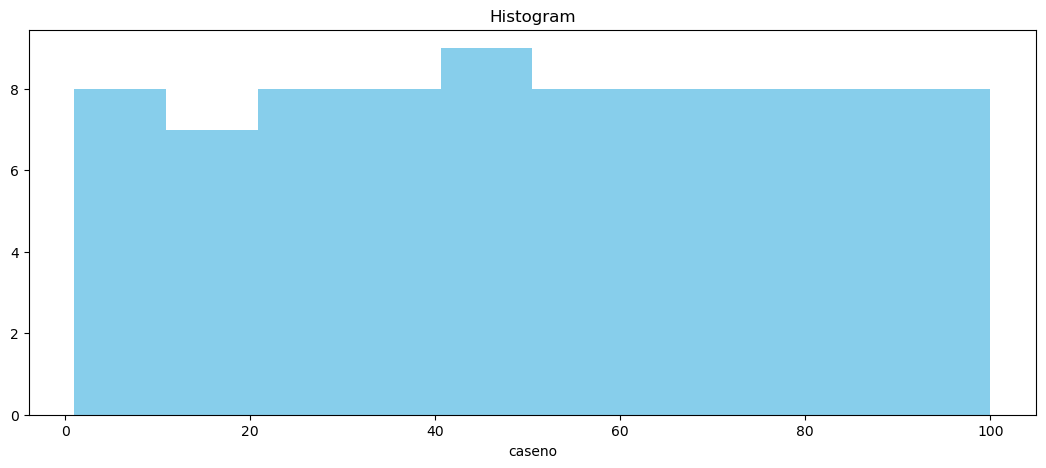

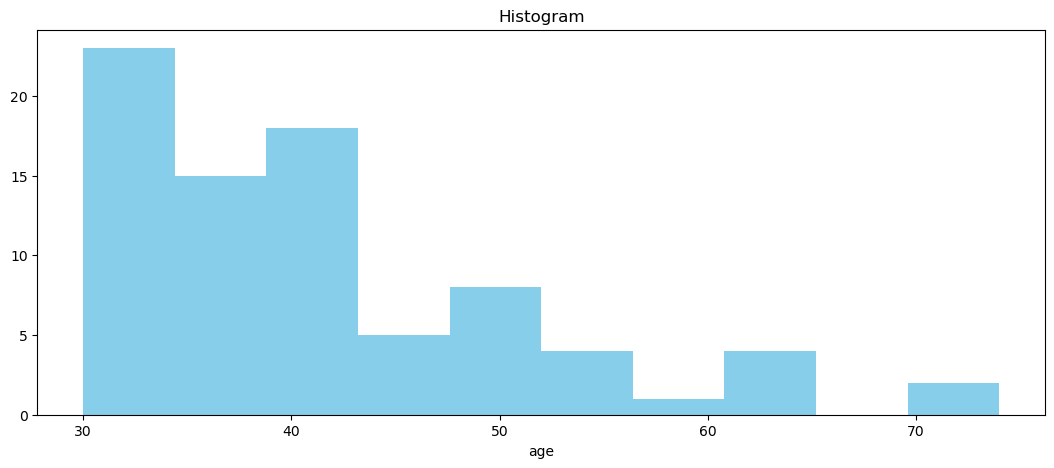

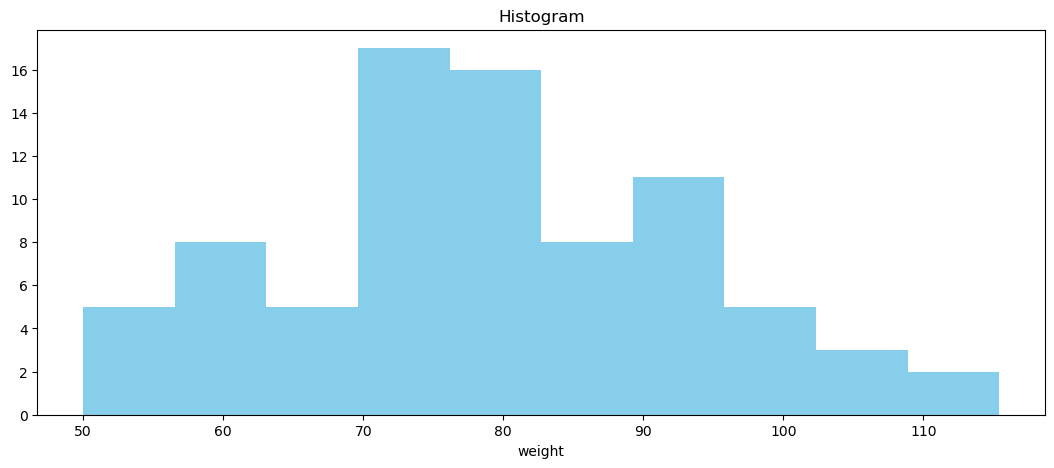

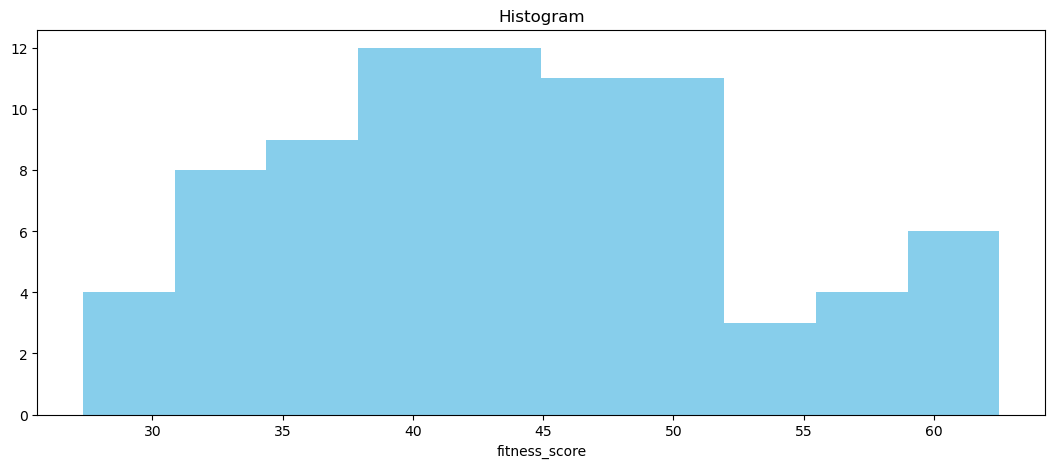

In [16]:
#Histogram for Numerical data
for i in numerical:
    plt.figure(figsize=(13, 5))  
    plt.hist(x_train[i],color='skyblue') 
    plt.title('Histogram')  
    plt.xlabel(i)
    plt.show()

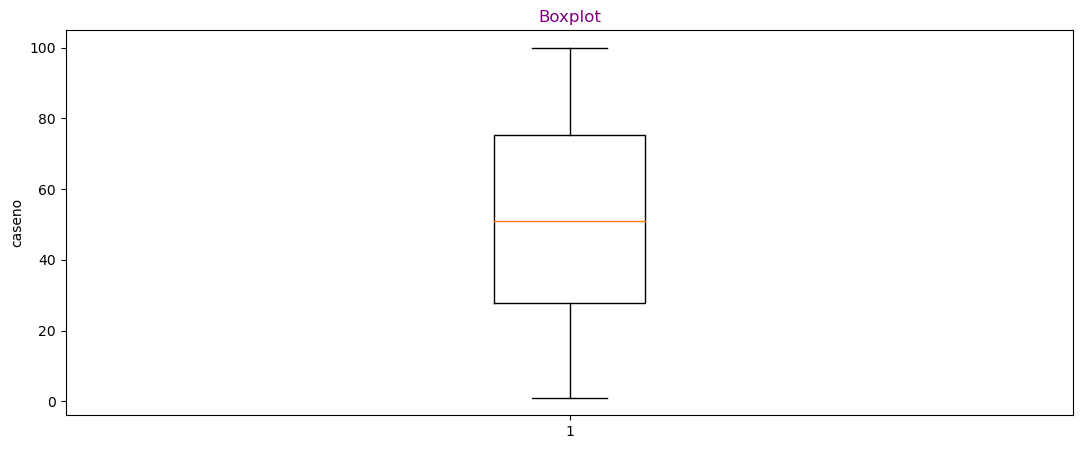

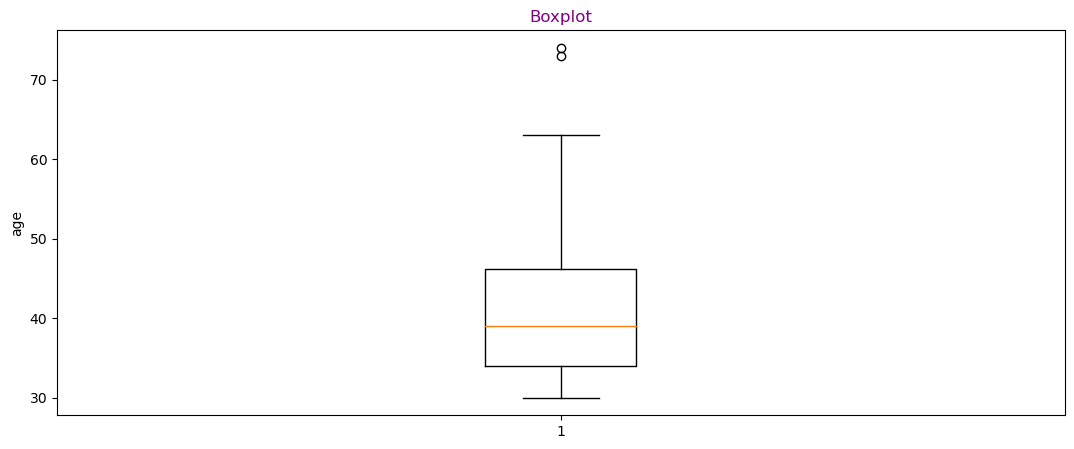

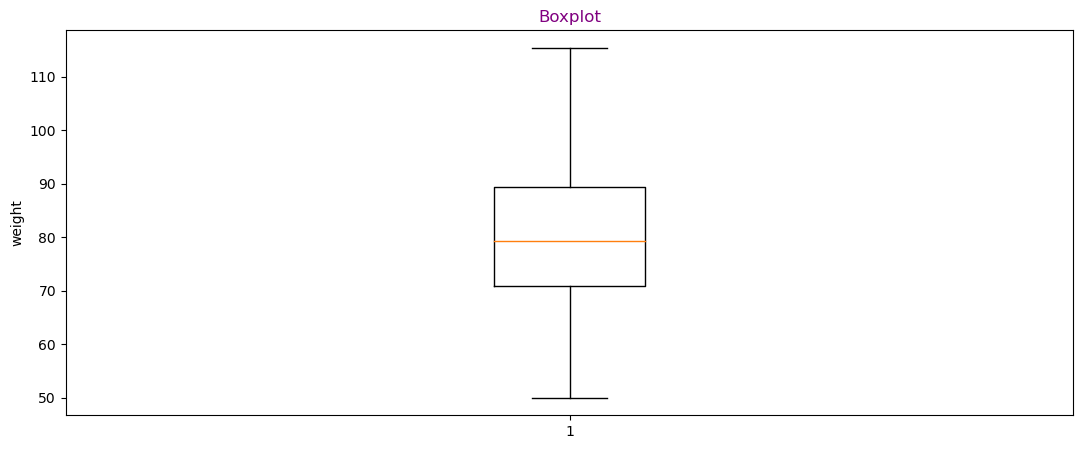

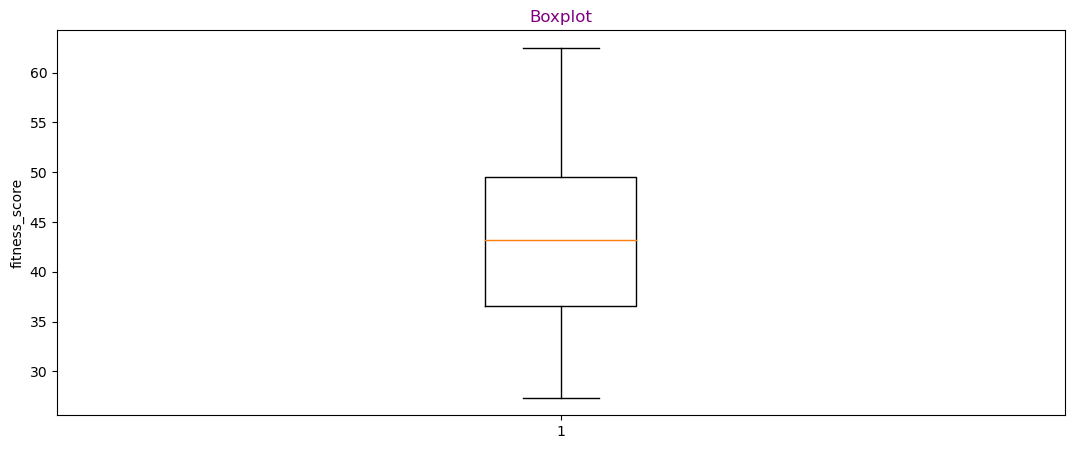

In [17]:
#Boxplot for numerical data
for i in numerical:
    plt.figure(figsize=(13, 5))
    plt.boxplot(x_train[i])
    plt.title('Boxplot',color='purple')
    plt.ylabel(i)
    plt.show()

In [18]:
for i in numerical:
    statistic, p_value = stats.shapiro(x_train[i])
    alpha = 0.05
    if p_value > alpha:
        print(f"The data looks normally distributed (p-value = {p_value})")
    else:
        print(f"The data does not look normally distributed (p-value = {p_value})")

The data does not look normally distributed (p-value = 0.011856095865368843)
The data does not look normally distributed (p-value = 7.745699690531183e-07)
The data looks normally distributed (p-value = 0.7674805521965027)
The data looks normally distributed (p-value = 0.08477989584207535)


In [19]:
y_train = y_train.to_frame(name='cardiac_condition')
y_test=y_test.to_frame(name='cardiac_condition')

# Transformation of Data

In [20]:
#Convert the categorical data into numerical data by label encoding
label_encoder = preprocessing.LabelEncoder()
col_1=['gender']
for i in col_1:
    x_train[i]= label_encoder.fit_transform(x_train[i])
    x_test[i]= label_encoder.fit_transform(x_test[i])
col_2=['cardiac_condition']
for i in col_2:
    y_train[i]= label_encoder.fit_transform(y_train[i])
    y_test[i]= label_encoder.fit_transform(y_test[i])

In [21]:
#Standardized/normalised the data by min max scaler so all values lies between 0 to 1
min_max= MinMaxScaler()
min_max_train = min_max.fit_transform(x_train)
min_max_test = min_max.fit_transform(x_test)
x_train = pd.DataFrame(min_max_train, columns=x_train.columns, index=x_train.index)
x_test = pd.DataFrame(min_max_test, columns=x_test.columns, index=x_test.index)

In [22]:
#getting all the columns having value correlation greater than 0.8
matrix = x_train.corr()
col = [matrix.columns[i] for i in range(len(matrix.columns)) for j in range(i) if abs(matrix.iloc[i, j]) >= 0.8]
col

[]

In [23]:
#Calculating the VIF of each columns to check multicollinearity
variance_inflance_factor = pd.DataFrame()
variance_inflance_factor['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
variance_inflance_factor['variable'] = x_train.columns
variance_inflance_factor

,VIF,variable
0,4.361256,caseno
1,2.151007,age
2,4.700902,weight
3,4.772423,gender
4,4.171980,fitness_score


# Logistic Regression sklearn library

In [24]:
#Use the sklearn library of Logistic Regression
logistic_model = LogisticRegression()

# Fit the model
logistic_model.fit(x_train, y_train)

# Make predictions
y_pred = logistic_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

C:\Users\gaura\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
accuracy

0.75

In [26]:
balanced_accuracy_score(y_test,y_pred)

0.75

# Evaluation

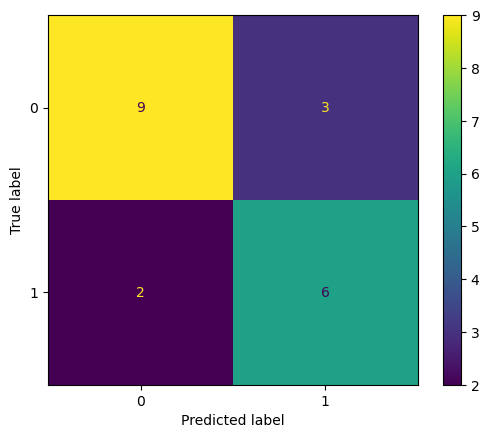

In [27]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [28]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.67      0.75      0.71         8

    accuracy                           0.75        20
   macro avg       0.74      0.75      0.74        20
weighted avg       0.76      0.75      0.75        20



ROC AUC: 0.75


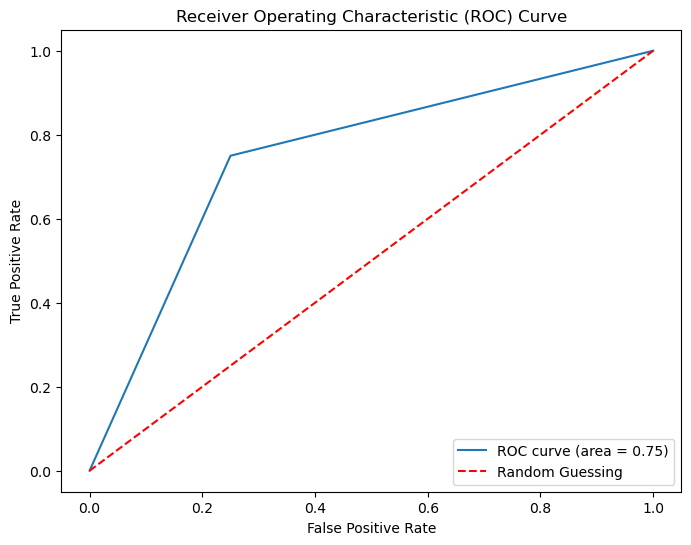

In [29]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc)

# ROC Curve (Optional)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [30]:
log_likelihood = logistic_model.score(x_train, y_train)

In [31]:
coefficients = logistic_model.coef_[0]
coefficients

array([ 0.13799386,  1.57587422,  0.65164031,  0.68528437, -1.07269282])

In [32]:
x_train.drop(columns=['caseno'],inplace=True)

In [33]:
x_test.drop(columns=['caseno'],inplace=True)

In [34]:
logistic_model = LogisticRegression()

# Fit the model
logistic_model.fit(x_train, y_train)

# Make predictions
y_pred = logistic_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

C:\Users\gaura\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
accuracy

0.8

In [36]:
balanced_accuracy_score(y_test,y_pred)

0.7916666666666667

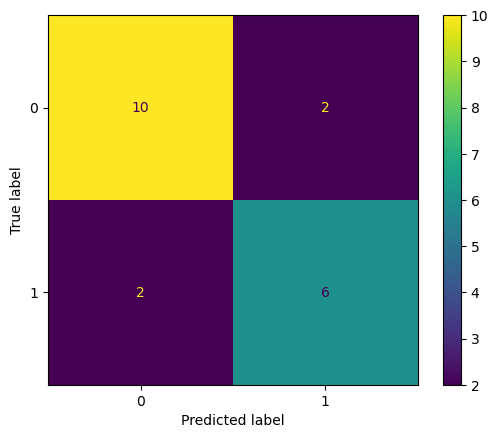

In [37]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [38]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.75      0.75      0.75         8

    accuracy                           0.80        20
   macro avg       0.79      0.79      0.79        20
weighted avg       0.80      0.80      0.80        20



ROC AUC: 0.7916666666666667


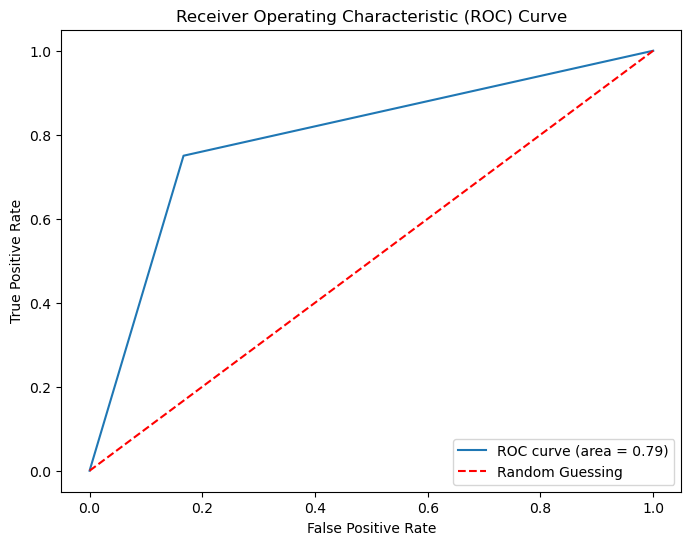

In [39]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression Stats Model 

In [40]:
x_train_1 = sm.add_constant(x_train)

# Fit the logistic regression model
logistic_model = sm.Logit(y_train, x_train_1)
logistic_results = logistic_model.fit()

logistic_results.summary()

Optimization terminated successfully.
         Current function value: 0.513592
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      cardiac_condition   No. Observations:                   80
Model:                          Logit   Df Residuals:                       75
Method:                           MLE   Df Model:                            4
Date:                Wed, 03 Jan 2024   Pseudo R-squ.:                  0.1967
Time:                        20:19:22   Log-Likelihood:                -41.087
converged:                       True   LL-Null:                       -51.149
Covariance Type:            nonrobust   LLR p-value:                 0.0004722
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.6193      1.170     -1.384      0.166      -3.913       0.674
age               3.5855      1.262      2.842      0.004       1.113       6.058
weight            0.5157      1.654      0.312      0.755      -2.726       3.758
gender            1.5278      0.896      1.706      0.088      -0.228       3.284
fitness_score    -2.9604      1.777     -1.666      0.096      -6.444       0.523
=================================================================================
"""

In [41]:
np.exp(logistic_results.params)

const             0.198045
age              36.069884
weight            1.674878
gender            4.608206
fitness_score     0.051800
dtype: float64

In [42]:
logistic_results.wald_test("(age=0,weight=0,gender=0,fitness_score=0)")

C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\base\model.py:1906: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[14.06468496]], p-value=0.007091444086452715, df_denom=4>

In [43]:
pred=logistic_results.predict(sm.add_constant(x_test))
prediction=[1 if x>0.5 else 0 for x in pred]

In [44]:
prediction

[0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0]

In [45]:
params = np.exp(logistic_results.params)
conf = np.exp(logistic_results.conf_int())
conf['OR'] = params
pvalue = round(logistic_results.pvalues,3)
conf['pvalue'] = pvalue
conf.columns = ['CI 95%(2.5%)','CI 95%(97.5%)', 'Odds Ratio', 'pvalue']
print((conf))

               CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const              0.019986       1.962456    0.198045   0.166
age                3.042534     427.616090   36.069884   0.004
weight             0.065464      42.851364    1.674878   0.755
gender             0.796239      26.669835    4.608206   0.088
fitness_score      0.001590       1.687460    0.051800   0.096


In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = x_train.columns
vif["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
print(vif)

        Features       VIF
0            age  1.992811
1         weight  4.060761
2         gender  4.764083
3  fitness_score  3.290921


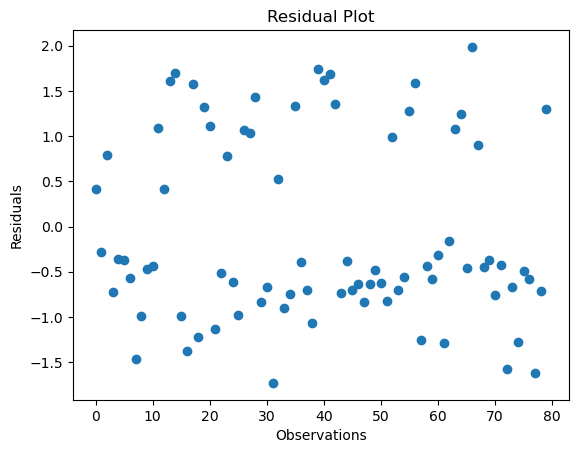

In [47]:
residuals = logistic_results.resid_dev

# Plot residuals
plt.scatter(np.arange(len(residuals)), residuals)
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Evaluation

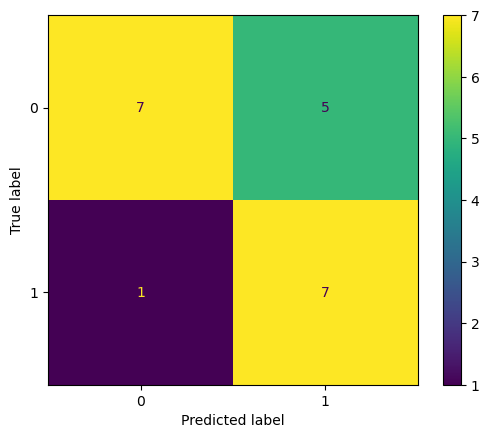

In [48]:
ConfusionMatrixDisplay(confusion_matrix(y_test,prediction)).plot()

In [49]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.58      0.88      0.70         8

    accuracy                           0.70        20
   macro avg       0.73      0.73      0.70        20
weighted avg       0.76      0.70      0.70        20



In [50]:
balanced_accuracy_score(y_test,prediction)

0.7291666666666667